# Introduction

Pokémon is one of the most popular game franchises in the world, with hundreds of unique creatures, each having their own stats, types, and abilities. In this project, I’ll analyze a dataset of Pokémon to explore trends, answer interesting questions, and create visualizations.

The goal of this analysis is to:

1. Clean and prepare the data for analysis.
2. Explore relationships between stats, types, and legendary status.
3. Identify patterns in Pokémon strengths and weaknesses.
4. Visualize findings in a way that’s both clear and engaging.

This project will be useful for practicing data cleaning, feature engineering, exploratory data analysis (EDA), and visualization using Python libraries like Pandas, NumPy, and Matplotlib/Seaborn.

## Importing Necessary Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create a dataframe

In [22]:
pokemon_df = pd.read_csv('pokemon_data.csv')

Find all null values

In [23]:
pokemon_df[pokemon_df.isnull().any(axis=1)]

# We can see through this that the NaN values are all GMax pokemon

,id,name,base_experience,height,weight,types,abilities,moves,stats
1219,10195,venusaur-gmax,236,240,10000,"grass, poison","overgrow, chlorophyll",NaN,"hp=80, attack=82, defense=83, special-attack=1..."
1220,10196,charizard-gmax,240,280,10000,"fire, flying","blaze, solar-power",NaN,"hp=78, attack=84, defense=78, special-attack=1..."
1221,10197,blastoise-gmax,239,250,10000,water,"torrent, rain-dish",NaN,"hp=79, attack=83, defense=100, special-attack=..."
1222,10198,butterfree-gmax,178,170,10000,"bug, flying","compound-eyes, tinted-lens",NaN,"hp=60, attack=45, defense=50, special-attack=9..."
1223,10199,pikachu-gmax,112,210,10000,electric,"static, lightning-rod",NaN,"hp=35, attack=55, defense=40, special-attack=5..."
1224,10200,meowth-gmax,58,330,10000,normal,"pickup, technician, unnerve",NaN,"hp=40, attack=45, defense=35, special-attack=4..."
1225,10201,machamp-gmax,227,250,10000,fighting,"guts, no-guard, steadfast",NaN,"hp=90, attack=130, defense=80, special-attack=..."
1226,10202,gengar-gmax,225,200,10000,"ghost, poison",cursed-body,NaN,"hp=60, attack=65, defense=60, special-attack=1..."
1227,10203,kingler-gmax,166,190,10000,water,"hyper-cutter, shell-armor, sheer-force",NaN,"hp=55, attack=130, defense=115, special-attack..."
1228,10204,lapras-gmax,187,240,10000,"water, ice","water-absorb, shell-armor, hydration",NaN,"hp=130, attack=85, defense=80, special-attack=..."


Spread out the stats column

In [24]:
stats = pokemon_df['stats'].str.findall(r'\d+').apply(lambda x: list(map(int, x)))

pokemon_df[['hp','attack','defense','special-attack','special-defense','speed']] = pd.DataFrame(stats.tolist(), index=pokemon_df.index)

pokemon_df['total_stats'] = pokemon_df[['hp','attack','defense','special-attack','special-defense','speed']].sum(axis=1)

pokemon_df.head()

,id,name,base_experience,height,weight,types,abilities,moves,stats,hp,attack,defense,special-attack,special-defense,speed,total_stats
0,1,bulbasaur,64,7,69,"grass, poison","overgrow, chlorophyll","razor-wind, swords-dance, cut, bind, vine-whip","hp=45, attack=49, defense=49, special-attack=6...",45,49,49,65,65,45,318
1,2,ivysaur,142,10,130,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=60, attack=62, defense=63, special-attack=8...",60,62,63,80,80,60,405
2,3,venusaur,236,20,1000,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=80, attack=82, defense=83, special-attack=1...",80,82,83,100,100,80,525
3,4,charmander,62,6,85,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=39, attack=52, defense=43, special-attack=6...",39,52,43,60,50,65,309
4,5,charmeleon,142,11,190,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=58, attack=64, defense=58, special-attack=8...",58,64,58,80,65,80,405


Split the types

In [25]:
pokemon_df[['type1','type2']] = pokemon_df['types'].str.split(',', expand=True).apply(lambda x: x.str.strip())

pokemon_df_columns = pokemon_df.columns.tolist()

pokemon_df_columns.remove('types')
pokemon_df_columns.remove('stats')

pokemon_df_columns.insert(5, pokemon_df_columns.pop(pokemon_df_columns.index('type1')))
pokemon_df_columns.insert(6, pokemon_df_columns.pop(pokemon_df_columns.index('type2')))

pokemon_df = pokemon_df[pokemon_df_columns]

pokemon_df

,id,name,base_experience,height,weight,type1,type2,abilities,moves,hp,attack,defense,special-attack,special-defense,speed,total_stats
0,1,bulbasaur,64,7,69,grass,poison,"overgrow, chlorophyll","razor-wind, swords-dance, cut, bind, vine-whip",45,49,49,65,65,45,318
1,2,ivysaur,142,10,130,grass,poison,"overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt",60,62,63,80,80,60,405
2,3,venusaur,236,20,1000,grass,poison,"overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt",80,82,83,100,100,80,525
3,4,charmander,62,6,85,fire,None,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...",39,52,43,60,50,65,309
4,5,charmeleon,142,11,190,fire,None,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...",58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,10273,ogerpon-wellspring-mask,275,12,398,grass,water,water-absorb,"swords-dance, slam, vine-whip, double-kick, ta...",80,120,84,60,96,110,550
1298,10274,ogerpon-hearthflame-mask,275,12,398,grass,fire,mold-breaker,"swords-dance, slam, vine-whip, double-kick, ta...",80,120,84,60,96,110,550
1299,10275,ogerpon-cornerstone-mask,275,12,398,grass,rock,sturdy,"swords-dance, slam, vine-whip, double-kick, ta...",80,120,84,60,96,110,550
1300,10276,terapagos-terastal,90,3,160,normal,None,tera-shell,"headbutt, body-slam, take-down, double-edge, roar",95,95,110,105,110,85,600


## Data Exploration

### Most Common Ranges for Total Stats

In [26]:
pokemon_df.query('total_stats > 640').sort_values(by='total_stats', ascending=False).head(100)

,id,name,base_experience,height,weight,type1,type2,abilities,moves,hp,attack,defense,special-attack,special-defense,speed,total_stats
1214,10190,eternatus-eternamax,563,1000,0,poison,dragon,pressure,"fly, flamethrower, hyper-beam, solar-beam, toxic",255,115,250,125,250,130,1125
1067,10043,mewtwo-mega-x,351,23,1270,psychic,fighting,steadfast,"pay-day, fire-punch, ice-punch, thunder-punch,...",106,190,100,154,100,130,780
1068,10044,mewtwo-mega-y,351,15,330,psychic,None,insomnia,"pay-day, fire-punch, ice-punch, thunder-punch,...",106,150,70,194,120,140,780
1103,10079,rayquaza-mega,351,108,3920,dragon,flying,delta-stream,"swords-dance, fly, bind, roar, flamethrower",105,180,100,180,100,115,780
1102,10078,groudon-primal,347,50,9997,ground,fire,desolate-land,"fire-punch, thunder-punch, swords-dance, cut, ...",100,180,160,150,90,90,770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,10266,koraidon-swimming-build,335,35,3030,fighting,dragon,"orichalcum-pulse, orichalcum-pulse","swords-dance, body-slam, take-down, roar, flam...",100,135,115,85,100,135,670
887,888,zacian,335,28,1100,fairy,None,intrepid-sword,"swords-dance, body-slam, take-down, bite, hype...",92,120,115,80,115,138,660
645,646,kyurem,297,30,3250,dragon,ice,pressure,"cut, fly, body-slam, take-down, roar",125,130,90,130,90,95,660
888,889,zamazenta,335,29,2100,fighting,None,dauntless-shield,"body-slam, take-down, bite, roar, hyper-beam",92,120,115,80,115,138,660


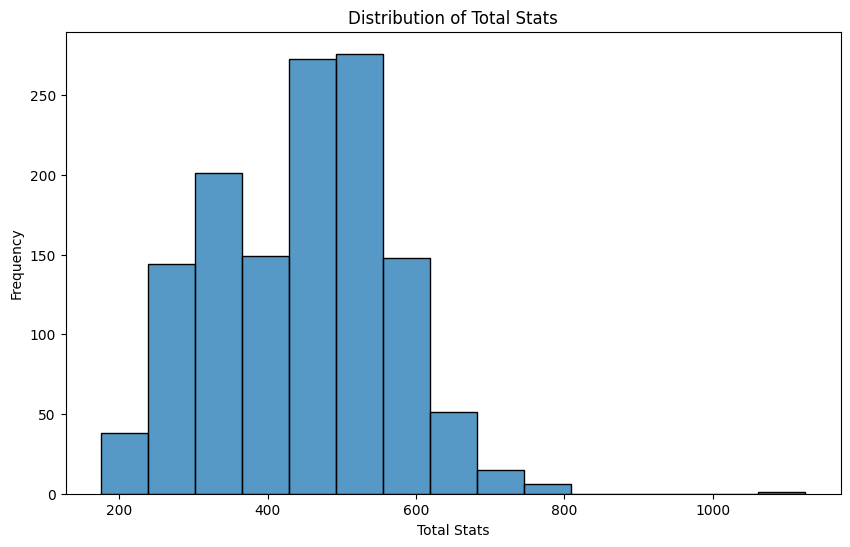

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=pokemon_df, x='total_stats', bins=15)
plt.title('Distribution of Total Stats')
plt.xlabel('Total Stats')
plt.ylabel('Frequency')
plt.show()

### Find average total stats by type and compare to number of pokemon in each type

Seperate the Pokemon so that they can be counted in both types

In [28]:
pokemon_melted = pokemon_df.melt(id_vars=[col for col in pokemon_df.columns if col not in ['type1', 'type2']],
                value_vars=['type1','type2'],
                var_name='type_category',
                value_name='type').dropna(subset=['type'])

pokemon_melted.sort_values(by='id', inplace=True)
pokemon_melted.reset_index(drop=True, inplace=True)

pokemon_melted

,id,name,base_experience,height,weight,abilities,moves,hp,attack,defense,special-attack,special-defense,speed,total_stats,type_category,type
0,1,bulbasaur,64,7,69,"overgrow, chlorophyll","razor-wind, swords-dance, cut, bind, vine-whip",45,49,49,65,65,45,318,type1,grass
1,1,bulbasaur,64,7,69,"overgrow, chlorophyll","razor-wind, swords-dance, cut, bind, vine-whip",45,49,49,65,65,45,318,type2,poison
2,2,ivysaur,142,10,130,"overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt",60,62,63,80,80,60,405,type2,poison
3,2,ivysaur,142,10,130,"overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt",60,62,63,80,80,60,405,type1,grass
4,3,venusaur,236,20,1000,"overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt",80,82,83,100,100,80,525,type1,grass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,10274,ogerpon-hearthflame-mask,275,12,398,mold-breaker,"swords-dance, slam, vine-whip, double-kick, ta...",80,120,84,60,96,110,550,type2,fire
2024,10275,ogerpon-cornerstone-mask,275,12,398,sturdy,"swords-dance, slam, vine-whip, double-kick, ta...",80,120,84,60,96,110,550,type1,grass
2025,10275,ogerpon-cornerstone-mask,275,12,398,sturdy,"swords-dance, slam, vine-whip, double-kick, ta...",80,120,84,60,96,110,550,type2,rock
2026,10276,terapagos-terastal,90,3,160,tera-shell,"headbutt, body-slam, take-down, double-edge, roar",95,95,110,105,110,85,600,type1,normal


Average Stats per type

In [29]:
avg_stats_per_type = pd.pivot_table(data = pokemon_melted, index = 'type', values = 'total_stats', aggfunc = 'mean').sort_values(by='total_stats', ascending=False)

avg_stats_per_type

,total_stats
type,
dragon,551.149533
fighting,496.260000
steel,493.725275
psychic,488.397059
dark,468.563830
fire,467.631068
ice,467.227273
flying,458.006711
ghost,455.630435


Number of Pokemon in each type

In [31]:
count_per_type = pd.pivot_table(data=pokemon_melted, index='type', values='id', aggfunc='count')

count_per_type.sort_values(by='type', inplace=True)

count_per_type

,id
type,
bug,104
dark,94
dragon,107
electric,110
fairy,83
fighting,100
fire,103
flying,149
ghost,92


Text(0, 0.5, 'Type')

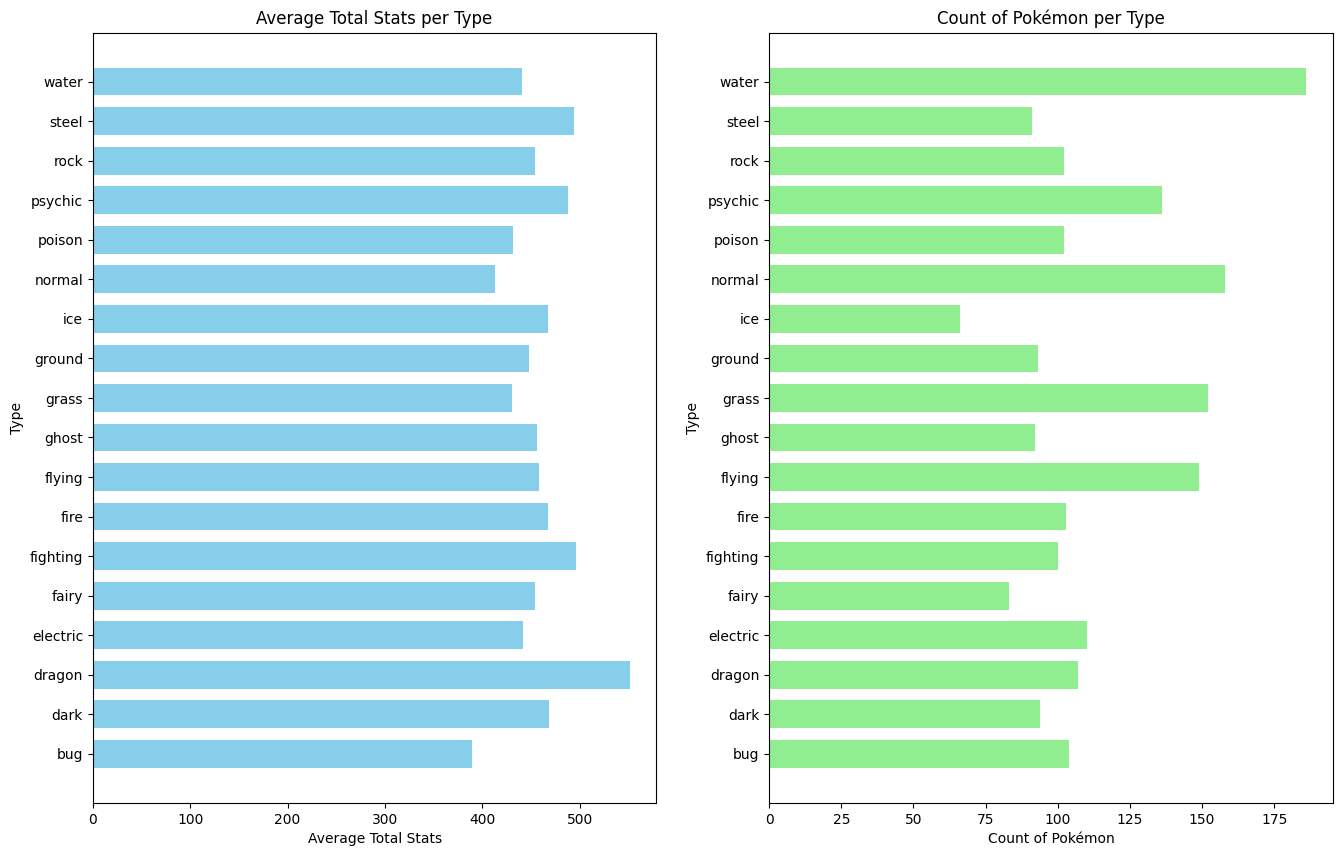

In [32]:
avg_stats_per_type_sorted = avg_stats_per_type.sort_values(by='type')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 10))
ax1.barh(avg_stats_per_type_sorted.index, avg_stats_per_type_sorted['total_stats'], height=0.7, color='skyblue')
ax2.barh(count_per_type.index , count_per_type['id'], height=0.7, color='lightgreen')

ax1.set_title('Average Total Stats per Type')
ax1.set_xlabel('Average Total Stats')
ax1.set_ylabel('Type')
ax2.set_title('Count of Pokémon per Type')
ax2.set_xlabel('Count of Pokémon')
ax2.set_ylabel('Type')

### Average stats per type

In [39]:
avg_atk_per_type = pd.pivot_table(data = pokemon_melted, index = 'type', values = 'attack', aggfunc = 'mean').sort_values(by='attack', ascending=False)
avg_spatk_per_type = pd.pivot_table(data = pokemon_melted, index = 'type', values = 'special-attack', aggfunc = 'mean').sort_values(by='special-attack', ascending=False)
avg_hp_per_type = pd.pivot_table(data = pokemon_melted, index = 'type', values = 'hp', aggfunc = 'mean').sort_values(by='hp', ascending=False)
avg_def_per_type = pd.pivot_table(data = pokemon_melted, index = 'type', values = 'defense', aggfunc = 'mean').sort_values(by='defense', ascending=False)
avg_spdef_per_type = pd.pivot_table(data = pokemon_melted, index = 'type', values = 'special-defense', aggfunc = 'mean').sort_values(by='special-defense', ascending=False)
avg_spe_per_type = pd.pivot_table(data = pokemon_melted, index = 'type', values = 'speed', aggfunc = 'mean').sort_values(by='speed', ascending=False)

avg_atk_per_type_sorted = avg_atk_per_type.sort_values(by='type', inplace=True)
avg_spatk_per_type_sorted = avg_spatk_per_type.sort_values(by='type', inplace=True)
avg_hp_per_type_sorted = avg_hp_per_type.sort_values(by='type', inplace=True)
avg_def_per_type_sorted = avg_def_per_type.sort_values(by='type', inplace=True)
avg_spdef_per_type_sorted = avg_spdef_per_type.sort_values(by='type', inplace=True)
avg_spe_per_type_sorted = avg_spe_per_type.sort_values(by='type', inplace=True)


combined = pd.concat([avg_spe_per_type, avg_spdef_per_type, avg_def_per_type, avg_spatk_per_type, avg_atk_per_type, avg_hp_per_type], axis=1)

combined.reset_index(inplace=True)

combined

,type,speed,special-defense,defense,special-attack,attack,hp
0,bug,61.923077,67.557692,71.596154,58.528846,71.586538,57.980769
1,dark,78.978723,71.180851,72.382979,74.702128,95.457447,75.861702
2,dragon,86.046729,87.280374,90.355140,98.345794,100.018692,89.102804
3,electric,85.309091,69.009091,66.572727,83.654545,73.627273,63.936364
4,fairy,69.698795,88.361446,75.060241,82.120482,71.530120,67.638554
5,fighting,83.360000,74.230000,81.870000,66.980000,110.490000,79.330000
6,fire,76.184466,73.718447,72.203883,88.485437,85.048544,71.990291
7,flying,85.771812,72.355705,69.335570,77.765101,81.281879,71.496644
8,ghost,68.945652,79.250000,79.076087,82.782609,79.597826,65.978261
9,grass,63.276316,73.480263,74.394737,73.157895,78.105263,67.684211


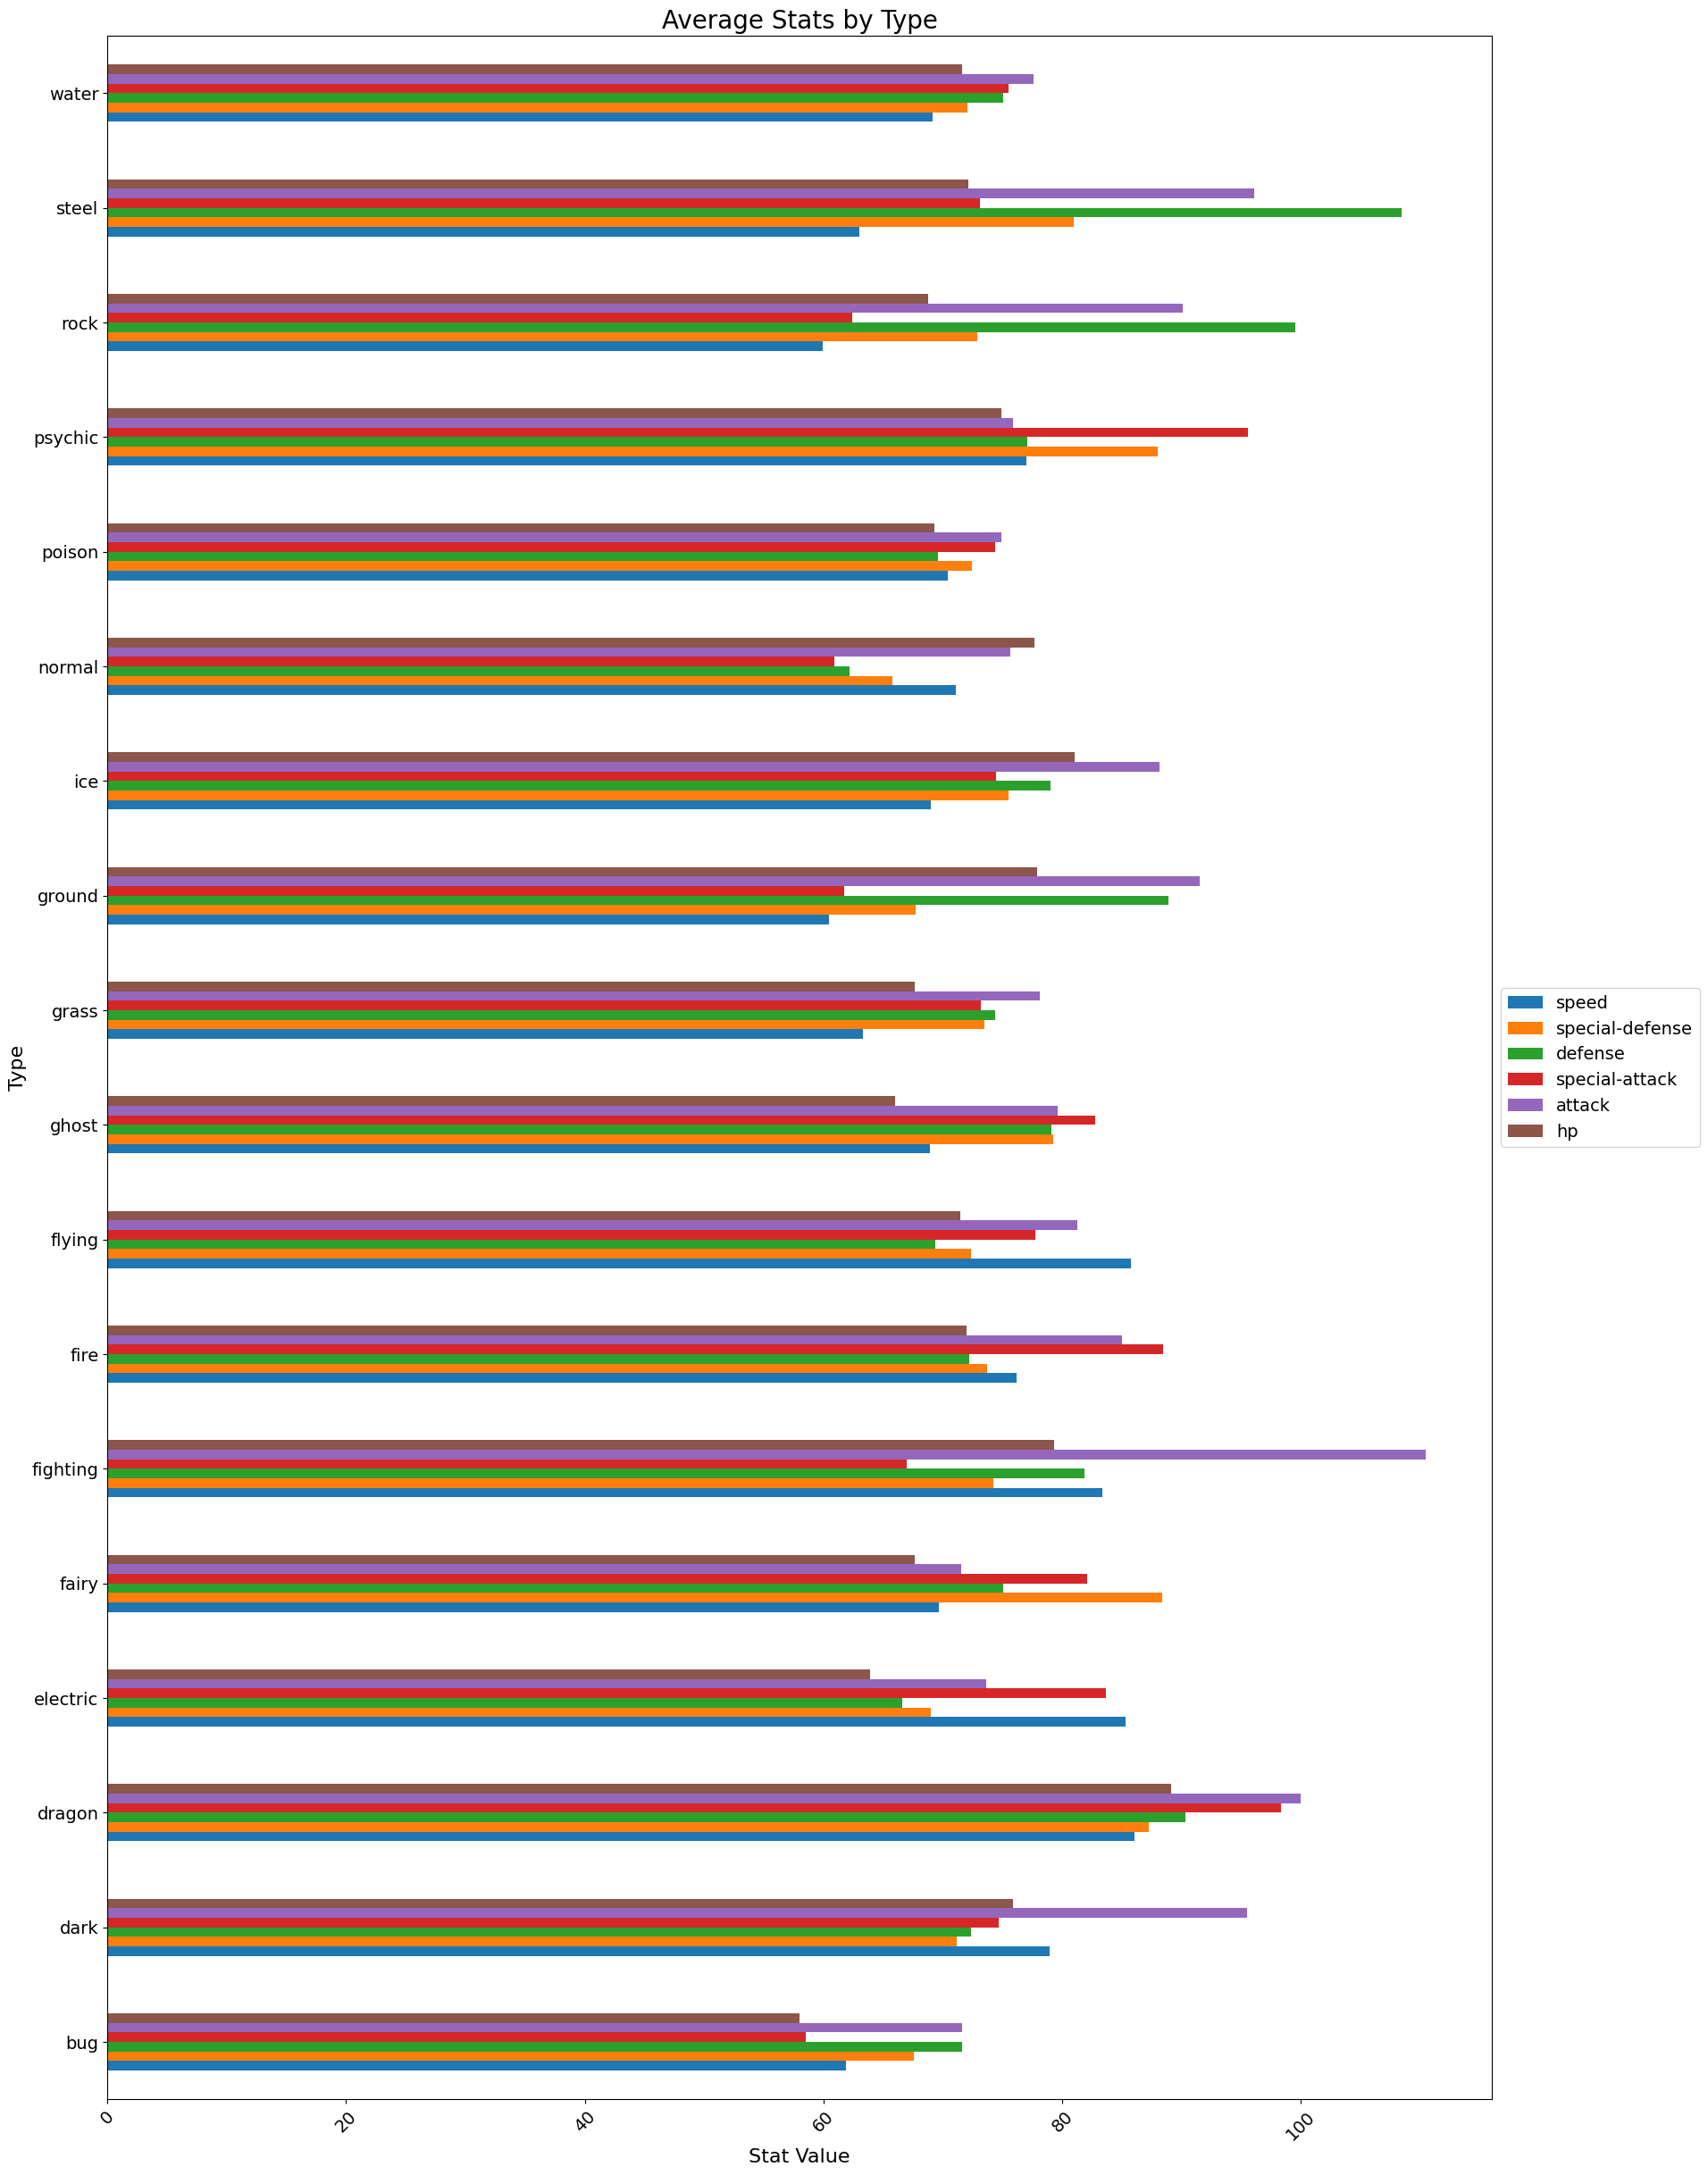

In [40]:
combined.set_index('type').plot(kind='barh', figsize=(20, 30), fontsize=14)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.title('Average Stats by Type', fontsize=20)
plt.ylabel('Type', fontsize=16)
plt.xlabel('Stat Value', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Conclusion

From the chart, several patterns emerge in the average stats across Pokémon types:

1. Dragon-types stand out as the most powerful overall, leading in nearly every stat category — particularly in attack, special attack, and HP. This supports their reputation as end-game or rare Pokémon with high battle potential.
2. Steel-types excel in defense and special defense, making them strong defensive picks.
3. Psychic-types have very high special attack, suggesting they are strong at dealing special damage.
4.Rock and Ground-types have above-average defense but tend to have lower speed, indicating a trade-off between durability and agility.
5. Bug-types generally have the lowest average stats across the board, which aligns with their common role as early-game or lower-tier Pokémon.
6. Electric-types have notably high speed, making them effective for quick strikes in battle.

Overall, this visualization highlights how each type has clear strengths and weaknesses, with Dragons dominating overall power, and other types excelling in specific niches.

